**Import libraries**

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error , confusion_matrix

**Read data**

In [35]:
df=pd.read_excel(r"Rent.xlsx")
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


**Summarize data**

In [36]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


**EDA**

In [37]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [38]:
df.duplicated().sum()
df.drop_duplicates()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


**Visualization**

In [41]:
cdf=df[['area','rent']]
cdf.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


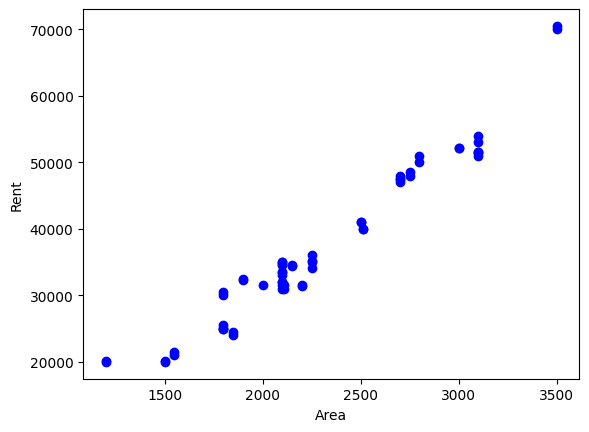

In [42]:
plt.scatter(cdf.area,cdf.rent,color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.show()


**Train/Test split**

In [59]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]
cdf.shape



(60, 2)

**Model**

In [62]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
x=np.asanyarray(train[['area']])
y=np.asanyarray(train[['rent']])
reg.fit(x,y)
print("coeficient: ",reg.coef_)

coeficient:  [[21.6287157]]


**Predictions**

In [66]:
x=np.asanyarray(test[['area']])
y=np.asanyarray(test[['rent']])
y_hat=reg.predict(x)
print(y.shape)
print("Residual sum of squares: %.2f"%np.mean((y_hat-y)**2))
print("Variance : %.2f"%reg.score(x,y))

(8, 1)
Residual sum of squares: 5989981.95
Variance : 0.96


**Evaluation**

In [51]:
print("MAE : %.2f" %np.mean(np.absolute(y_hat-y)))
print("MSE : %.2f"%np.mean((y_hat-y)**2))
print("R2_Score : %.2f"%reg.score(y_hat,y))

MAE : 1546.21
MSE : 3492467.70
R2_Score : -7547.35


**Difference Visualization**

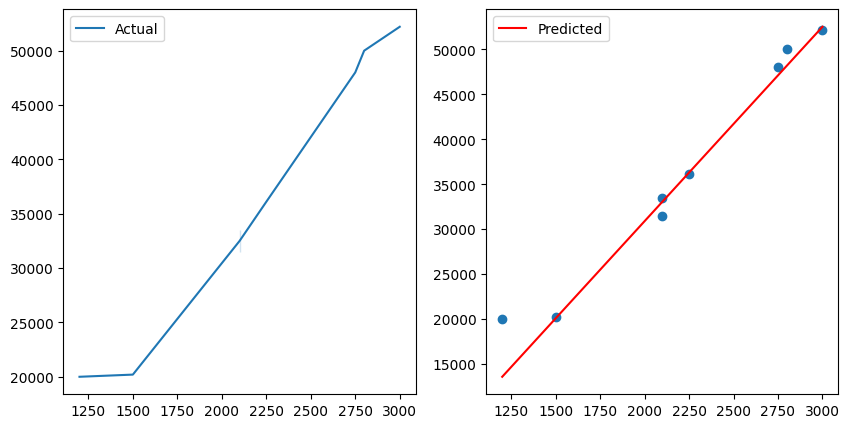

In [79]:
#xtest=np.array(x)
#print(xtest.shape)
#plt.title("Actual VS Prediction")
#plt.xlabel("Area")
#plt.ylabel("Rent")
#sns.scatterplot(x=xtest,y=y,color='r')
#sns.lineplot(x=xtest,y=y_hat)
#sns.lineplot(x=xtest,y=y,color='g')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sttrplot=plt.scatter(x=x, y=y)
# Plot a barplot on each subplot
sns.lineplot(x=x.flatten(), y=y.flatten(), ax=axes[0],label='Actual')
sns.lineplot(x=x.flatten(), y=y_hat.flatten(), ax=axes[1], label="Predicted",color='r')

# Show the plot
plt.show()